DEBUG s:
data      2015-05-05
stocks       spy,agg
Name: 0, dtype: object
save the a png picture finished!
DEBUG s:
data        2015-05-05
stocks    spy,agg,baba
Name: 1, dtype: object
save the a png picture finished!
DEBUG s:
data      2015-05-05
stocks      spy,baba
Name: 2, dtype: object
save the a png picture finished!
DEBUG s:
data      2015-05-05
stocks           spy
Name: 3, dtype: object
save the a png picture finished!
DEBUG s:
data      2015-05-05
stocks          baba
Name: 4, dtype: object
save the a png picture finished!


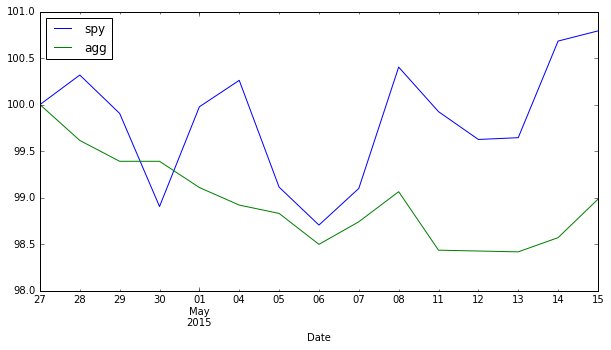

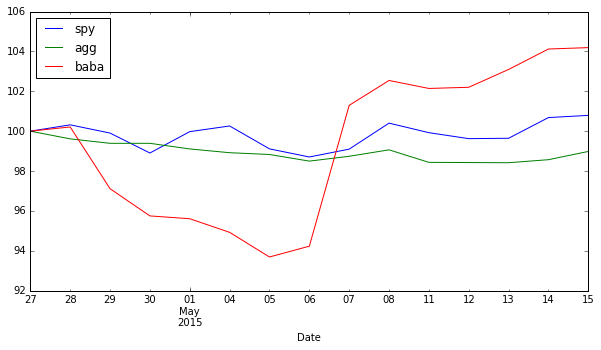

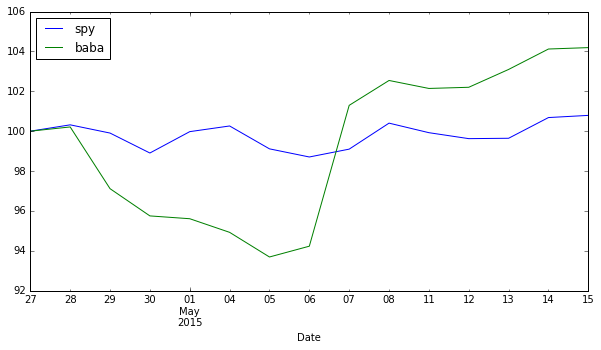

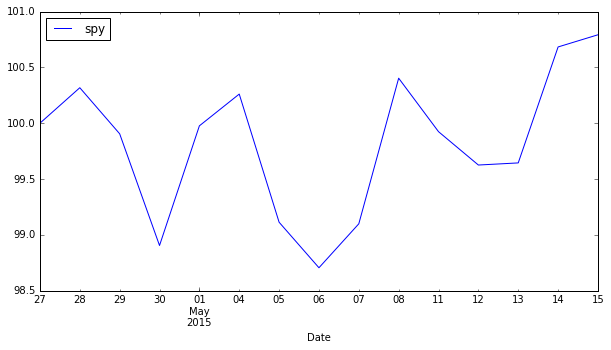

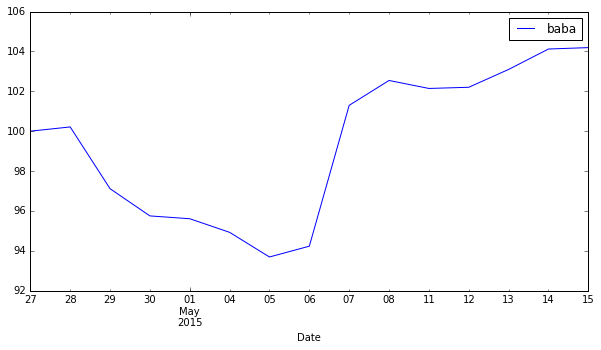

In [23]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import numpy as np
import ffn
import bt
import ffn
import datetime
from dateutil import parser

input_filename="input.csv"
period=10 # period of display in days

"""
return a png figure
"""
def plot1():
	fig = Figure()
	axis = fig.add_subplot(1, 1, 1)

	xs = range(100)
	ys = [random.randint(1, 50) for x in xs]

	axis.plot(xs, ys)
	canvas = FigureCanvas(fig)
	output = StringIO.StringIO()
	canvas.print_png(output)
	response = make_response(output.getvalue())
	response.mimetype = 'image/png'
	return response

"""
save a png figure
"""
def plot2(s):
	# Date parsing and calculation
	date_string=s[0]
	dt = parser.parse(date_string)
	dt_min = dt - datetime.timedelta(period)
	dt_max = dt + datetime.timedelta(period)
	df_min_string = dt_min.date().isoformat()
	df_max_string = dt_max.date().isoformat()
	stocks=s[1]
	print "DEBUG s:"
	print s
	# retrieve stocks 


	# download price data from Yahoo! Finance. By default,
	# the Adj. Close will be used.
	prices = ffn.get(stocks, start=df_min_string, end=df_max_string)
	# let's compare the relative performance of each stock
	# we will rebase here to get a common starting point for both securities
	ax = prices.rebase().plot(figsize=(10,5))
	# save the figure
	fig = ax.get_figure()
	fig.savefig(date_string+stocks+'png')
	# Debug
	print "save the a png picture finished!"





# @app.route("/"+figue_name)
# def display(figue_name):
# 	plot2()
# 	return figure_path

# @app.route("/")
# def index():


if __name__ == "__main__":

	df = pd.read_csv(input_filename, names=['data','stocks'])
	df.apply(plot2,axis=1)

	# app.run()